In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as shc
from matplotlib.pyplot import figure
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial import ConvexHull,convex_hull_plot_2d

In [2]:
#local path where the data locates, change it to your local path
record= pd.read_csv("Desktop/Carnivore_Research/CS_21Jan27.csv")

In [3]:
col=['Time_Seen','Species','Latitude','Longitude','Media']

In [4]:
record.columns = col
record['Time_Seen'] = pd.to_datetime(record.Time_Seen,utc=True).copy()
record['Month'] = record.Time_Seen.dt.month
record['Hour'] = record.Time_Seen.dt.hour
record['Year'] = record.Time_Seen.dt.year

In [5]:
#king county boundaries
maxLat = 47.7763
minLat = 47.1878
maxLon = -121.0941
minLon = -122.5346

In [6]:
rec19 = record[record.Year == 2019]

In [7]:
rec19_coyo = rec19[rec19.Species == 'Coyote']

In [8]:
rec19_coyo = rec19_coyo.drop(['Time_Seen','Species','Month','Hour','Year','Media'],axis=1)

In [9]:
rec19_king = rec19_coyo[(rec19_coyo['Latitude']>minLat)&(rec19_coyo['Latitude']<maxLat)&(rec19_coyo['Longitude']>minLon)&(rec19_coyo['Longitude']<maxLon)]

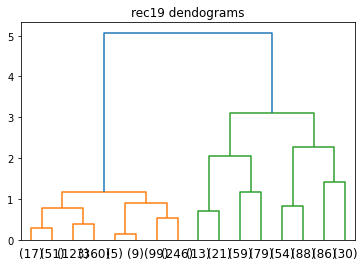

In [10]:
plt.title("rec19 dendograms")
dend = shc.dendrogram(shc.linkage(rec19_king,method='ward'),truncate_mode='level',p=3)

In [11]:
rec19_cluster3 = AgglomerativeClustering(n_clusters =3, affinity='euclidean',linkage='ward')
rec19_cluster3.fit_predict(rec19_king)

array([0, 1, 0, ..., 1, 1, 1])

Text(0.5, 1.0, 'Hierarchical Coyote cluster3')

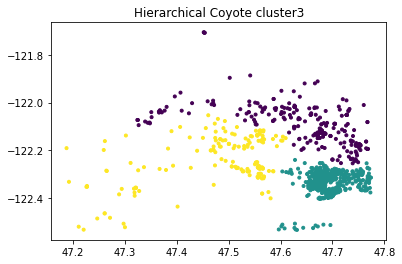

In [12]:
plt.scatter(rec19_king.iloc[:,0],rec19_king.iloc[:,1],c=rec19_cluster3.labels_,marker='.')
plt.title('Hierarchical Coyote cluster3')

In [13]:
rec19_cluster5 = AgglomerativeClustering(n_clusters =5, affinity='euclidean',linkage='ward')
rec19_cluster5.fit_predict(rec19_king)

array([3, 1, 0, ..., 1, 1, 1])

Text(0.5, 1.0, 'Hierarchical Coyote cluster5')

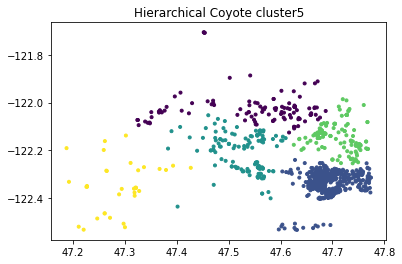

In [14]:
plt.scatter(rec19_king.iloc[:,0],rec19_king.iloc[:,1],c=rec19_cluster5.labels_,marker='.')
plt.title('Hierarchical Coyote cluster5')

In [15]:
#saving the dataframe to csv locally, used for importing to arcgis
HierClus = rec19_king.copy()
HierClus3DF = pd.DataFrame(HierClus)
HierClus3DF["labels"]= rec19_cluster3.labels_
HierClus3DF.to_csv('coyo19HierarchicalC3_lat_long.csv')

In [16]:
#saving the dataframe to csv locally, used for importing to arcgis
HierClus5DF = pd.DataFrame(HierClus)
HierClus5DF["labels"]= rec19_cluster5.labels_
HierClus5DF.to_csv('coyo19HierarchicalC5_lat_long.csv')